In [1]:
import spacy
from collections import Counter
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../../data/raw/OMIEC_NEUROMORPHIC_07_08_24.xls')

In [ ]:
# Carregar o modelo de linguagem SpaCy
nlp = spacy.load("en_core_web_sm")

# Supondo que 'df' seja um DataFrame que contém os abstracts na coluna 'Abstract'
abstracts = df['Abstract']

# Termos de interesse
focus_terms = ['omiec','oect']  # Substitua com os termos de interesse ou deixe vazio para visualizar todos

# Processar os abstracts com SpaCy
docs = [nlp(abstract) for abstract in abstracts]

# Análise NLP e extração de termos importantes
term_freq = Counter()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True:
            if token.pos_ in ["NOUN", "ADJ"]:
                term_freq[token.lemma_] += 1

common_terms = term_freq.most_common(20)
print("Termos mais comuns:", common_terms)

# Criar um grafo de co-ocorrências
G = nx.Graph()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.pos_ in ["NOUN", "ADJ"]:
            for child in token.children:
                if child.pos_ in ["NOUN", "ADJ"]:
                    G.add_edge(token.lemma_, child.lemma_)

# Verificar se focus_terms está vazio
if not focus_terms:
    # Se focus_terms estiver vazio, use o grafo completo
    subG = G
else:
    # Caso contrário, criar um subgrafo focado nos termos de interesse
    subG = nx.Graph()
    for term in focus_terms:
        if term in G:
            neighbors = G.neighbors(term)
            subG.add_node(term)
            for neighbor in neighbors:
                subG.add_edge(term, neighbor)

# Ajustar a visualização do subgrafo ou grafo completo
plt.figure(figsize=(10, 10))

# Usar layout para uma melhor distribuição
pos = nx.spring_layout(subG, k=0.5, iterations=50)

# Desenhar o subgrafo ou grafo completo
nx.draw(
    subG, pos, 
    with_labels=True, 
    node_size=5000, 
    node_color='lightgreen', 
    font_size=12, 
    font_weight='bold',
    edge_color='black', 
    linewidths=1.5, 
    alpha=0.8
)

plt.title("Grafo de Co-ocorrências")
plt.show()

# Sugerir termos de busca baseado nos termos mais comuns no grafo
subgraph_terms = set(subG.nodes())
search_terms = [term for term, freq in common_terms if term in subgraph_terms]
print("Sugestões de termos de busca:", search_terms)

#### Playground

In [ ]:
# Carregar o modelo de linguagem SpaCy
nlp = spacy.load("en_core_web_sm")

# Lista de abstracts (exemplo, substitua pelos seus abstracts reais)
abstracts = df['Abstract']

# Processar os abstracts com SpaCy
docs = [nlp(abstract) for abstract in abstracts]

# Análise NLP e extração de termos importantes
term_freq = Counter()

for doc in docs:
    print(f"Texto: {doc.text}\n")
    print("Entidades Nomeadas (NER):")
    for ent in doc.ents:
        print(f"{ent.text} ({ent.label_})")
    
    print("\nTermos Importantes:")
    for token in doc:
        if token.is_stop != True and token.is_punct != True:
            print(f"{token.text} ({token.pos_})")
            if token.pos_ in ["NOUN", "ADJ"]:
                term_freq[token.lemma_] += 1
    
    print("\nDependências:")
    for token in doc:
        print(f"{token.text} --> {token.dep_} --> {token.head.text}")
    print("\n"+"-"*40+"\n")

# Termos mais comuns
common_terms = term_freq.most_common(20)
print("Termos mais comuns:", common_terms)

# Criar um grafo de co-ocorrências
G = nx.Graph()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.pos_ in ["NOUN", "ADJ"]:
            for child in token.children:
                if child.pos_ in ["NOUN", "ADJ"]:
                    G.add_edge(token.lemma_, child.lemma_)

# Plotar o grafo de co-ocorrências
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo de Co-ocorrências de Termos")
plt.show()

# Sugerir termos de busca baseado nos termos mais comuns
search_terms = [term for term, freq in common_terms]
print("Sugestões de termos de busca:", search_terms)


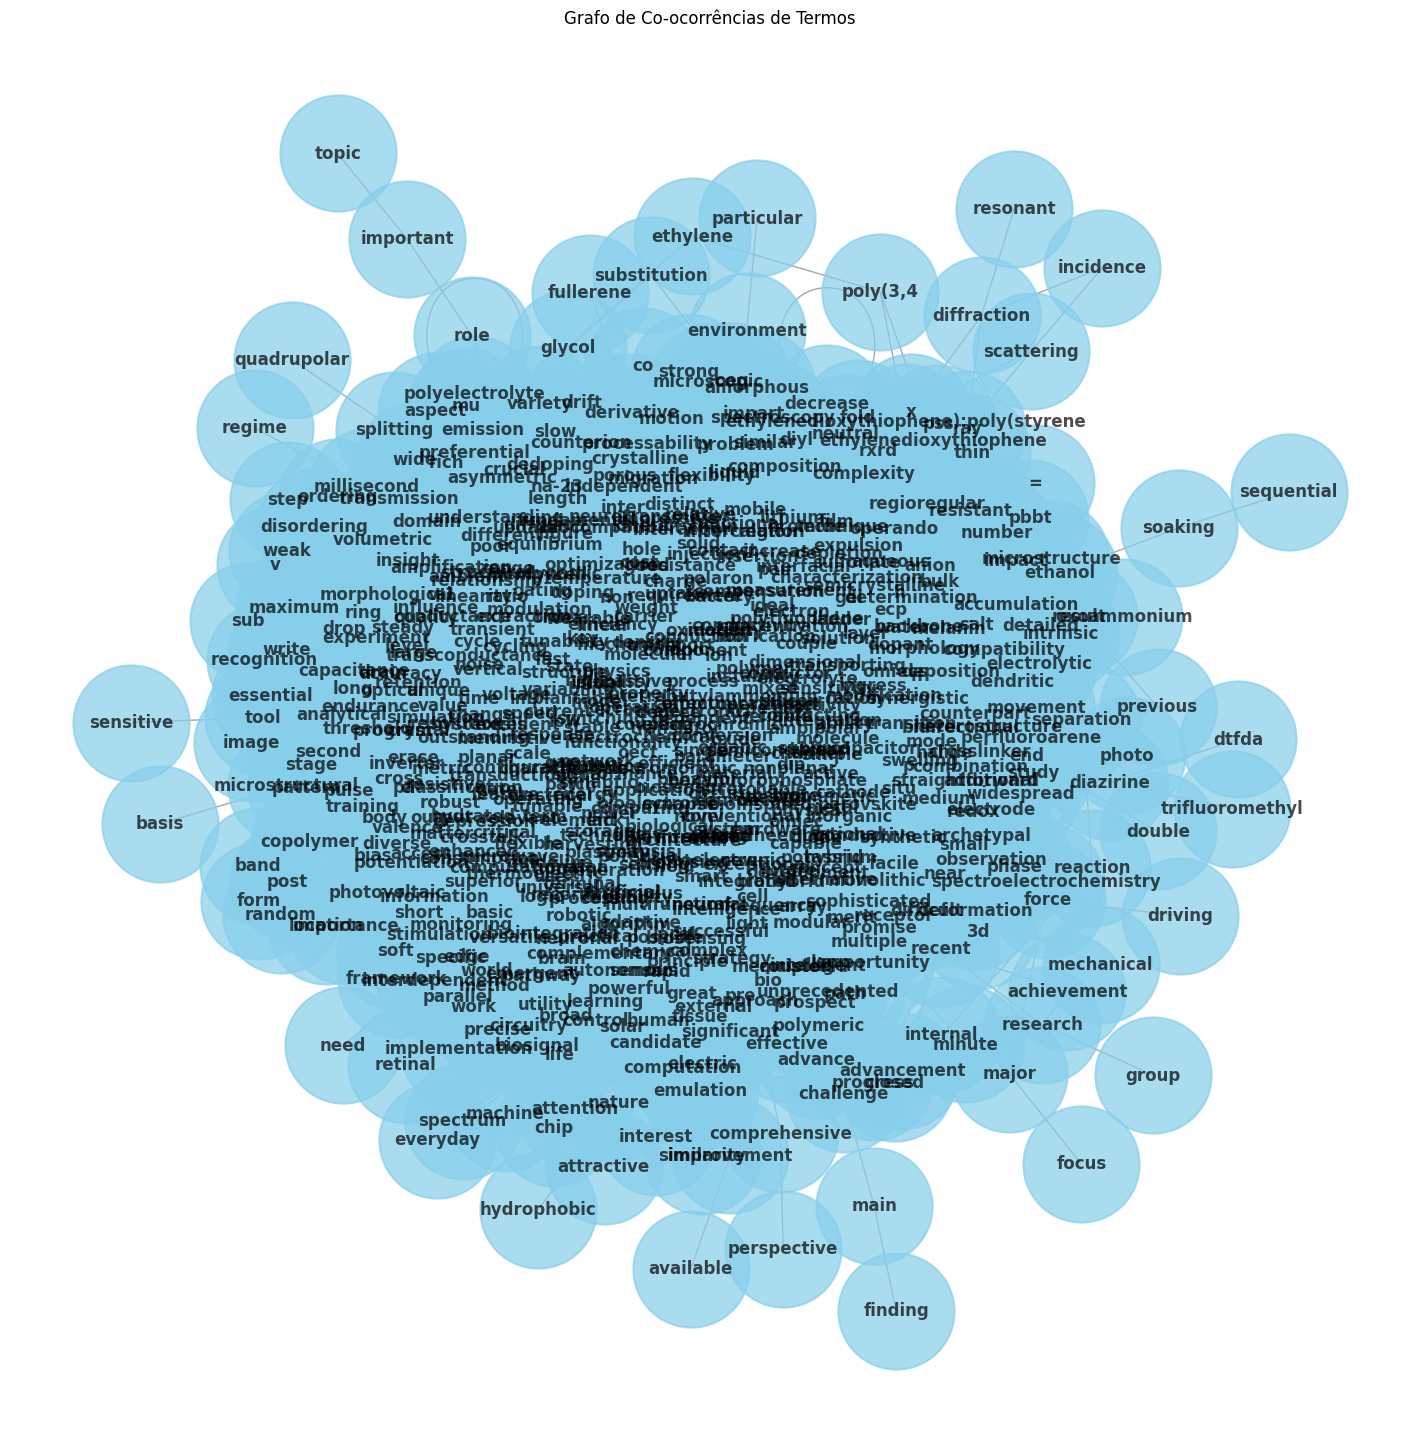

Sugestões de termos de busca: ['organic', 'electronic', 'device', 'ionic', 'neuromorphic', 'mixed', 'ion', 'electrochemical', 'material', 'application', 'conductor', 'high', 'polymer', 'transistor', 'transport', 'computing', 'film', 'bioelectronic', 'oect', 'charge']


In [3]:
import spacy
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o modelo de linguagem SpaCy
nlp = spacy.load("en_core_web_sm")

# Lista de abstracts (exemplo, substitua pelos seus abstracts reais)
abstracts = df['Abstract']

# Processar os abstracts com SpaCy
docs = [nlp(abstract) for abstract in abstracts]

# Análise NLP e extração de termos importantes
term_freq = Counter()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True:
            if token.pos_ in ["NOUN", "ADJ"]:
                term_freq[token.lemma_] += 1

# Filtrar para mostrar apenas os termos mais comuns
common_terms = term_freq.most_common(20)

# Criar um grafo de co-ocorrências
G = nx.Graph()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.pos_ in ["NOUN", "ADJ"]:
            for child in token.children:
                if child.pos_ in ["NOUN", "ADJ"]:
                    # Adicionar aresta ao grafo se ambos os termos forem comuns
                    if term_freq[token.lemma_] > 1 and term_freq[child.lemma_] > 1:
                        G.add_edge(token.lemma_, child.lemma_)

# Ajustar a visualização do grafo
plt.figure(figsize=(14, 14))

# Usar um layout diferente para distribuir melhor os nós
pos = nx.kamada_kawai_layout(G)

# Desenhar o grafo
nx.draw(
    G, pos, 
    with_labels=True, 
    node_size=7000, 
    node_color='skyblue', 
    font_size=12, 
    font_weight='bold',
    edge_color='gray', 
    linewidths=1.5, 
    alpha=0.7
)

plt.title("Grafo de Co-ocorrências de Termos")
plt.show()

# Sugerir termos de busca baseado nos termos mais comuns
search_terms = [term for term, freq in common_terms]
print("Sugestões de termos de busca:", search_terms)


#### Playground

In [ ]:
import spacy
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o modelo de linguagem SpaCy
nlp = spacy.load("en_core_web_sm")

# Lista de abstracts (exemplo, substitua pelos seus abstracts reais)
abstracts = [
    "Abstract 1 text on OMIECs and neuromorphic devices...",
    "Abstract 2 discussing the applications of OMIECs in neuromorphic computing...",
    "Further exploration of polymer-based OMIECs in the context of neuromorphic technology...",
    # Adicione mais abstracts aqui
]

# Termos de interesse
focus_terms = {"organic", "ionic", "electronic", "omiec", "conductor", "mixed"}

# Processar os abstracts com SpaCy
docs = [nlp(abstract) for abstract in abstracts]

# Análise NLP e extração de termos importantes
term_freq = Counter()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True:
            if token.pos_ in ["NOUN", "ADJ"]:
                term_freq[token.lemma_] += 1

# Criar um grafo de co-ocorrências
G = nx.Graph()

for doc in docs:
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.pos_ in ["NOUN", "ADJ"]:
            for child in token.children:
                if child.pos_ in ["NOUN", "ADJ"]:
                    G.add_edge(token.lemma_, child.lemma_)

# Criar um subgrafo focado nos termos de interesse
subG = nx.Graph()

for term in focus_terms:
    if term in G:
        neighbors = G.neighbors(term)
        subG.add_node(term)
        for neighbor in neighbors:
            subG.add_edge(term, neighbor)

# Ajustar a visualização do subgrafo
plt.figure(figsize=(10, 10))

# Usar layout para uma melhor distribuição
pos = nx.spring_layout(subG, k=0.5, iterations=50)

# Desenhar o subgrafo
nx.draw(
    subG, pos, 
    with_labels=True, 
    node_size=5000, 
    node_color='lightgreen', 
    font_size=12, 
    font_weight='bold',
    edge_color='black', 
    linewidths=1.5, 
    alpha=0.8
)

plt.title("Subgrafo de Co-ocorrências dos Termos Focados")
plt.show()

# Sugerir termos de busca baseado nos termos mais comuns no subgrafo
subgraph_terms = set(subG.nodes())
search_terms = [term for term, freq in common_terms if term in subgraph_terms]
print("Sugestões de termos de busca:", search_terms)